# Loading data

In [1028]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1082]:
# Load the CSV file
df = pd.read_csv('loan.csv', low_memory=False)
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [1030]:
print(df.info())
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None
(39717, 111)


# Data Cleansing

In [1031]:
# check if there are empty columns
df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [1032]:
# check for there are empty rows
df.isnull().all(axis=1).sum()

0

In [1033]:
# see how many columns with greater than 50% null values
missing_percentage = round(100 * df.isnull().sum() / len(df.index), 2)
missing_percentage[missing_percentage >= 50]

mths_since_last_delinq             64.66
mths_since_last_record             92.99
next_pymnt_d                       97.13
mths_since_last_major_derog       100.00
annual_inc_joint                  100.00
dti_joint                         100.00
verification_status_joint         100.00
tot_coll_amt                      100.00
tot_cur_bal                       100.00
open_acc_6m                       100.00
open_il_6m                        100.00
open_il_12m                       100.00
open_il_24m                       100.00
mths_since_rcnt_il                100.00
total_bal_il                      100.00
il_util                           100.00
open_rv_12m                       100.00
open_rv_24m                       100.00
max_bal_bc                        100.00
all_util                          100.00
total_rev_hi_lim                  100.00
inq_fi                            100.00
total_cu_tl                       100.00
inq_last_12m                      100.00
acc_open_past_24

#### Filter out columns with greater than 50% missing values

In [1034]:
df = df[missing_percentage[missing_percentage <= 50].index]

# remaining columns
len(df.columns)

54

In [1035]:
# check percentage of nulls in remaining columns
missing_percentage = round(100 * df.isnull().sum() / len(df.index), 2)
missing_percentage[missing_percentage > 0]

emp_title                      6.19
emp_length                     2.71
desc                          32.59
title                          0.03
revol_util                     0.13
last_pymnt_d                   0.18
last_credit_pull_d             0.01
collections_12_mths_ex_med     0.14
chargeoff_within_12_mths       0.14
pub_rec_bankruptcies           1.75
tax_liens                      0.10
dtype: float64

#### Check other columns with higher percentage of nulls 

In [1036]:
df[['emp_title', 'emp_length', 'desc']]

,emp_title,emp_length,desc
0,NaN,10+ years,Borrower added on 12/22/11 > I need to upgra...
1,Ryder,< 1 year,Borrower added on 12/22/11 > I plan to use t...
2,NaN,10+ years,NaN
3,AIR RESOURCES BOARD,10+ years,Borrower added on 12/21/11 > to pay for prop...
4,University Medical Group,1 year,Borrower added on 12/21/11 > I plan on combi...
...,...,...,...
39712,FiSite Research,4 years,Our current gutter system on our home is old a...
39713,"Squarewave Solutions, Ltd.",3 years,The rate of interest and fees incurred by carr...
39714,NaN,< 1 year,NaN
39715,NaN,< 1 year,NaN


In [1037]:
# drop desc column as it just contains additional free text info
df = df.drop('desc', axis=1)

In [1038]:
# check percentage of nulls in remaining columns
missing_percentage = round(100 * df.isnull().sum() / len(df.index), 2)
missing_percentage[missing_percentage > 0]

emp_title                     6.19
emp_length                    2.71
title                         0.03
revol_util                    0.13
last_pymnt_d                  0.18
last_credit_pull_d            0.01
collections_12_mths_ex_med    0.14
chargeoff_within_12_mths      0.14
pub_rec_bankruptcies          1.75
tax_liens                     0.10
dtype: float64

In [1039]:
# Check what's in emp_title and if its useful categorical information
df[['emp_title']].value_counts()

emp_title                        
US Army                              134
Bank of America                      109
IBM                                   66
AT&T                                  59
Kaiser Permanente                     56
                                    ... 
Hartford Financial Services Group      1
Hartford Board of Education            1
Harte Hanks                            1
Hart  and  Cooley                      1
zozaya officiating                     1
Name: count, Length: 28820, dtype: int64

In [1040]:
# drop emp_title column as it just contains additional info that doesn't seems too useful for analysis
df = df.drop('emp_title', axis=1)

In [1041]:
# drop rows where emp_length is null, as the percentage of missing records is not high
df = df.dropna(subset=['emp_length'])

In [1042]:
# check remaining percentage of nulls in remaining columns
missing_percentage = round(100 * df.isnull().sum() / len(df.index), 2)
missing_percentage[missing_percentage > 0]

title                         0.03
revol_util                    0.12
last_pymnt_d                  0.17
last_credit_pull_d            0.01
collections_12_mths_ex_med    0.14
chargeoff_within_12_mths      0.14
pub_rec_bankruptcies          1.80
tax_liens                     0.10
dtype: float64

#### Impute values of other numerical columns using 'describe' data

In [1044]:
# Check describe for missing columns - first for numerical values
df[['title', 'last_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'chargeoff_within_12_mths', 'pub_rec_bankruptcies', 'tax_liens']].describe()

,collections_12_mths_ex_med,chargeoff_within_12_mths,pub_rec_bankruptcies,tax_liens
count,38586.0,38586.0,37945.000000,38603.0
mean,0.0,0.0,0.041560,0.0
std,0.0,0.0,0.200507,0.0
min,0.0,0.0,0.000000,0.0
25%,0.0,0.0,0.000000,0.0
50%,0.0,0.0,0.000000,0.0
75%,0.0,0.0,0.000000,0.0
max,0.0,0.0,2.000000,0.0


In [1045]:
# Fillna 0 for 'collections_12_mths_ex_med', 'chargeoff_within_12_mths' and 'tax_liens' as they all seem to be 0
df.fillna({'collections_12_mths_ex_med': 0, 'chargeoff_within_12_mths': 0, 'tax_liens':0}, inplace=True)

In [1046]:
# check values for 'pub_rec_bankruptcies'
print(df['pub_rec_bankruptcies'].isna().sum())
print(df['pub_rec_bankruptcies'].value_counts())

697
pub_rec_bankruptcies
0.0    36375
1.0     1563
2.0        7
Name: count, dtype: int64


In [1047]:
# Fillna 0 for 'pub_rec_bankruptcies'
df.fillna({'pub_rec_bankruptcies': 0}, inplace=True)

In [1048]:
# check remaining percentage of nulls in remaining columns
missing_percentage = round(100 * df.isnull().sum() / len(df.index), 2)
missing_percentage[missing_percentage > 0]

title                 0.03
revol_util            0.12
last_pymnt_d          0.17
last_credit_pull_d    0.01
dtype: float64

#### Handle final remaining null columns

In [1049]:
# Check describe for remaining missing columns - now for categorical values
df[['title', 'revol_util', 'last_pymnt_d', 'last_credit_pull_d']].value_counts()

title                      revol_util  last_pymnt_d  last_credit_pull_d
Home Improvement           0%          May-16        May-16                3
Debt Consolidation Loan    59.70%      May-16        May-16                2
                           85%         May-16        May-16                2
                           69.90%      Dec-14        Apr-16                2
                           59.10%      May-16        May-16                2
                                                                          ..
                           83.10%      May-16        May-16                1
                           83.20%      Oct-15        May-16                1
                                       Sep-14        May-16                1
                           83.30%      Aug-12        Apr-16                1
îîMY FIRST CAR îî  76.30%      Jan-12        Dec-11                1
Name: count, Length: 38465, dtype: int64

In [1050]:
# dropping 'last_pymnt_d', 'last_credit_pull_d' as they seem to be payment and credit dates. 
# Also, revol_util does not look useful for analysis
df.drop(columns=['last_pymnt_d', 'last_credit_pull_d', 'revol_util'], inplace=True)

In [1051]:
# check remaining percentage of nulls in remaining columns
missing_percentage = round(100 * df.isnull().sum() / len(df.index), 2)
missing_percentage[missing_percentage > 0]

title    0.03
dtype: float64

In [1052]:
# very few are missing, so drop those
df = df.dropna(subset=['title'])

#### Check remaining percentage of nulls in remaining columns

In [1053]:
round(100 * df.isnull().sum() / len(df.index), 2).sum()

0.0

#### Consolidate product titles

In [1054]:
# Check the possible values for loan titles (types)
df['title'].value_counts().head(10)

title
Debt Consolidation           2144
Debt Consolidation Loan      1691
Personal Loan                 641
Consolidation                 511
debt consolidation            486
Credit Card Consolidation     348
Home Improvement              346
Debt consolidation            324
Small Business Loan           316
Credit Card Loan              306
Name: count, dtype: int64

In [1055]:
# 'Debt Consolidation' seems to appear in many formats, standardize it
df['title'] = df['title'].apply(lambda x: 'Debt Consolidation' if x.lower().startswith('debt consolidation') or 
                                                                  x.lower().startswith('consolidation') or
                                                                  x.lower().startswith('debt_consolidation') or
                                                                  x.lower().startswith('consolidate') else
                                          'Home Improvement' if x.lower().startswith('home improvement') or
                                                                x.lower().startswith('home') else
                                          'Credit Card' if x.lower().startswith('credit card') else
                                          'Personal Loan' if x.lower().startswith('personal') else
                                          'Consolidation' if (x.lower().startswith('consolidation') or x.startswith('consolidate')) else
                                          'Other Loan' if (x.lower().startswith('loan') or x.lower().startswith('my loan')) else x)
df['title'] = df['title'].apply(lambda x: x.replace(' Loan', ''))
print(df['title'].value_counts().head(20))
print(df.shape)

title
Debt Consolidation    7410
Credit Card           2503
Personal              1777
Home Improvement      1460
Other                 1225
Small Business         364
Wedding                359
Car                    226
Major Purchase         193
Medical                176
Debt                   144
Moving                 123
Business               110
Motorcycle             105
Freedom                 97
Pool                    82
Vacation                82
Engagement Ring         65
Lending Club            59
Auto                    58
Name: count, dtype: int64
(38632, 49)


In [1056]:
# Standardize loan issue dates
df['loan_issue_date'] = pd.to_datetime(df['issue_d'], format='%b-%y')

# Extract the month and year
df['loan_month'] = df['loan_issue_date'].dt.month
df['loan_year'] = df['loan_issue_date'].dt.year

# Data Insights

### Loan Information - Percentage of Loans Per Year

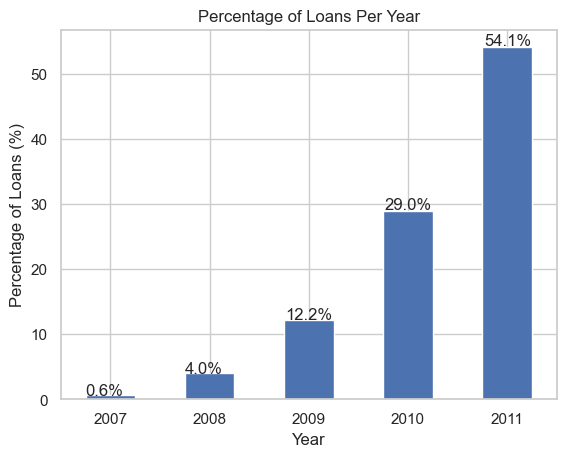

In [1057]:
# Loan timelines as per data available
loan_counts_per_year = round(df['loan_year'].value_counts(normalize=True) * 100, 1)

# Plot the percentage of loans per year
# plt.figure(figsize=(10, 6))
plot = loan_counts_per_year.sort_index().plot(kind='bar')
plt.title('Percentage of Loans Per Year')
plt.xlabel('Year')
plt.ylabel('Percentage of Loans (%)')
plt.xticks(rotation=0)
for p in plot.patches:
    plot.annotate(f"{str(p.get_height())}%", (p.get_x() * 1.005, p.get_height() * 1.005))

plt.grid(True)
plt.show()

### Top Loan categories

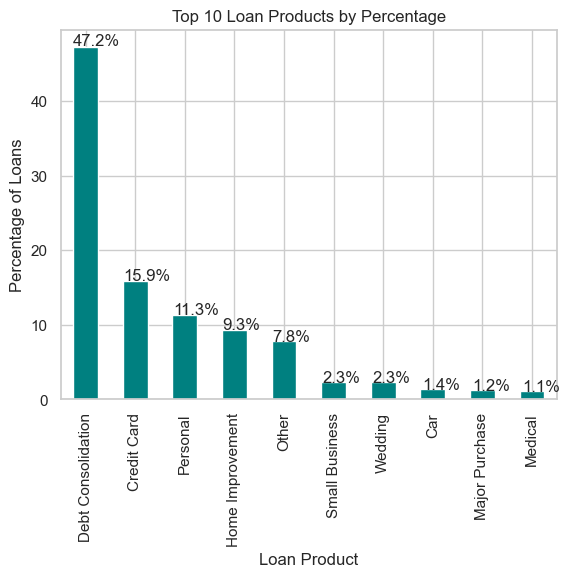

In [1058]:
# Top Loan categories
# Find the top 10 loan products by count
top_loan_products = df['title'].value_counts().nlargest(10)

# Calculate the percentage of loans for each of the top 10 loan products
top_loan_products_percentage = round((top_loan_products / top_loan_products.sum()) * 100, 1)

# Plot the top 10 loan products
plot = top_loan_products_percentage.plot(kind='bar', color='teal')
plt.title('Top 10 Loan Products by Percentage')
plt.xlabel('Loan Product')
plt.ylabel('Percentage of Loans')
plt.xticks(rotation=90)
for p in plot.patches:
    plot.annotate(f"{str(p.get_height())}%", (p.get_x() * 1.005, p.get_height() * 1.005))
    
plt.grid(True)
plt.show()

### Number of loans per term period

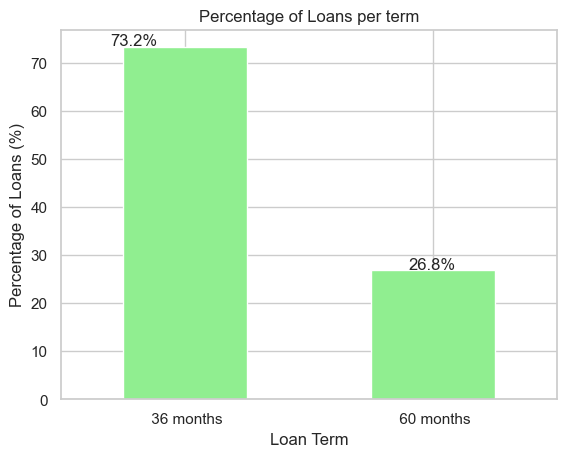

In [1059]:
# Get loan terms
loan_term_counts = round(df['term'].value_counts(normalize=True) * 100, 1)

# Plot the percentage of loans per year
# plt.figure(figsize=(10, 6))
plot = loan_term_counts.sort_index().plot(kind='bar', color='lightgreen')
plt.title('Percentage of Loans per term')
plt.xlabel('Loan Term')
plt.ylabel('Percentage of Loans (%)')
plt.xticks(rotation=0)
for p in plot.patches:
    plot.annotate(f"{str(p.get_height())}%", (p.get_x() * 1.205, p.get_height() * 1.005))

plt.grid(True)
plt.show()

### Loan Distribution
% distribution of default and non-default loans

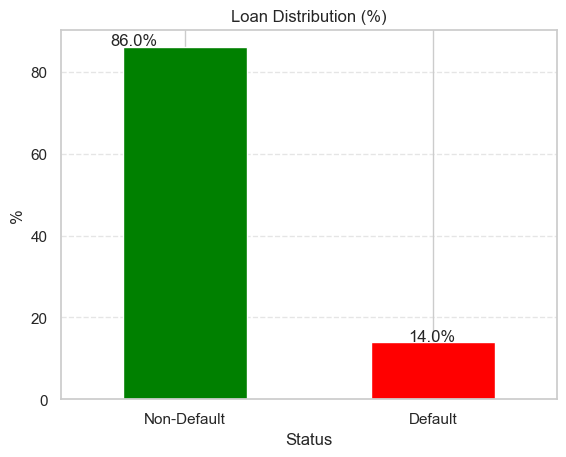

In [1060]:
# Calculate the value counts for the 'Category' column
df['default'] = df['loan_status'].apply(lambda x: 'Default' if x == 'Charged Off' else 'Non-Default')
loan_status_counts = df['default'].value_counts()

# Calculate the percentages
loan_status_percentages = round((loan_status_counts / loan_status_counts.sum()) * 100, 1)

# Plot it
plot = loan_status_percentages.plot(kind='bar', color=['green', 'red'])
plt.title('Loan Distribution (%)')
plt.xlabel('Status')
plt.ylabel('%')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)

for p in plot.patches:
    plot.annotate(f"{str(p.get_height())}%", (p.get_x() * 1.2, p.get_height() * 1.005))

plt.show()

### Grade of loan defaults
% of grades of all defaulted loans

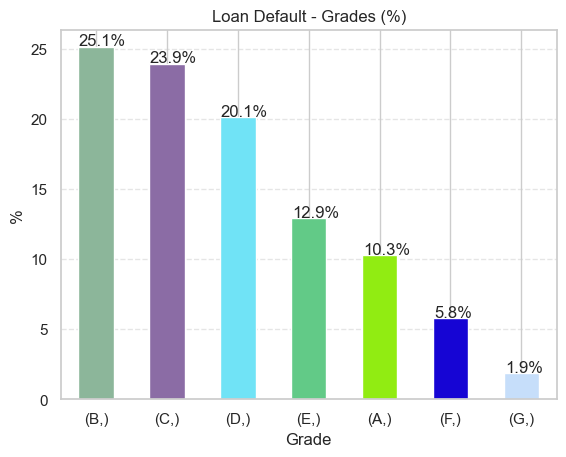

In [1061]:
# See which grade of loans default most
df_defaults = df[df['loan_status'] == 'Charged Off']
df_defaults_counts = df_defaults[['grade']].value_counts()

# Plot those grades
default_percentages = round((df_defaults_counts / df_defaults_counts.sum()) * 100, 1)

# Plot it
np.random.seed(0)
colors = np.random.rand(len(df_defaults_counts), 3) 
plot = default_percentages.plot(kind='bar', color=colors)
plt.title('Loan Default - Grades (%)')
plt.xlabel('Grade')
plt.ylabel('%')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)

for p in plot.patches:
    plot.annotate(f"{str(p.get_height())}%", (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()

In [1062]:
df_term_grades = df[df['default'] == 'Default'].groupby(['term', 'grade'], observed=True).size()
df_term_grades

term       grade
36 months  A        523
           B        933
           C        805
           D        564
           E        172
           F         55
           G         21
60 months  A         35
           B        422
           C        483
           D        521
           E        527
           F        258
           G         79
dtype: int64

### See which grade of loans default most

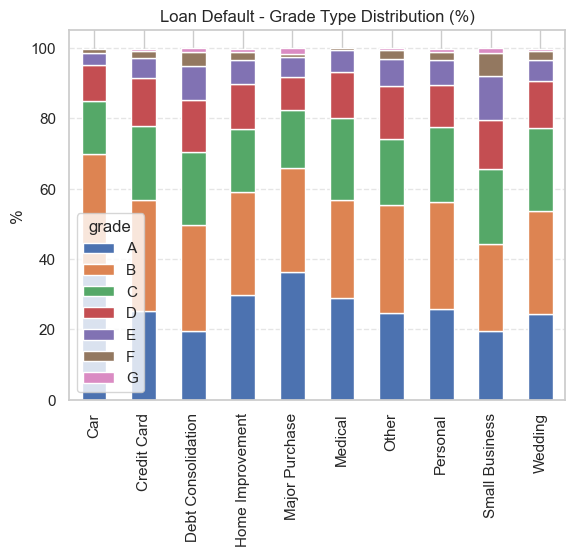

In [1063]:
# Calculate the counts of each loan product
loan_product_counts = df['title'].value_counts()

# Determine the top 10 loan products
top_loan_products = loan_product_counts.nlargest(10).index

# Filter the DataFrame to include only the top 10 loan products
df_top_products = df[df['title'].isin(top_loan_products)]

# Calculate the percentage of loans for each grade and loan product combination
loan_counts_by_grade = df_top_products.groupby(['title', 'grade']).size().unstack(fill_value=0)
loan_counts_by_grade_percentage = round(loan_counts_by_grade.div(loan_counts_by_grade_product.sum(axis=1), axis=0) * 100, 1)


# Plot it
np.random.seed(10)
colors = np.random.rand(len(df_defaults_counts), 3) 
plot = loan_counts_by_grade_percentage.plot(kind='bar', stacked=True)
plt.title('Loan Default - Grade Type Distribution (%)')
plt.xlabel('')
plt.ylabel('%')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

### Loan deafult percentages by title

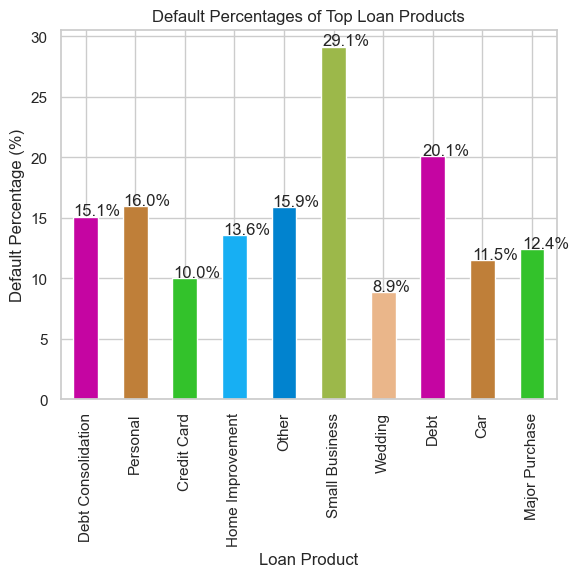

In [1064]:
# Calculate the total counts and default counts of each loan product
total_counts = df['title'].value_counts()
default_counts = df[df['default'] == 'Default'].groupby('title').size()

# Determine the top 10 loan products by default count
top_default_products = default_counts.nlargest(10).index

# Filter the counts to include only the top 10 default loan products
total_counts_top = total_counts[top_default_products]
default_counts_top = default_counts[top_default_products]

# Calculate the default percentages for the top 10 default loan products
default_percentages_top = round((default_counts_top / total_counts_top) * 100, 1)

# Plot the default percentages for the top 10 default loan products
np.random.seed(10)
colors = np.random.rand(len(df_defaults_counts), 3) 
plot = default_percentages_top.plot(kind='bar', color=colors)
plt.title('Default Percentages of Top Loan Products')
plt.xlabel('Loan Product')
plt.ylabel('Default Percentage (%)')
plt.grid(True)
for p in plot.patches:
    plot.annotate(f"{str(round(p.get_height(), 1))}%", (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()

### Loan Product distribution by grade of the loan

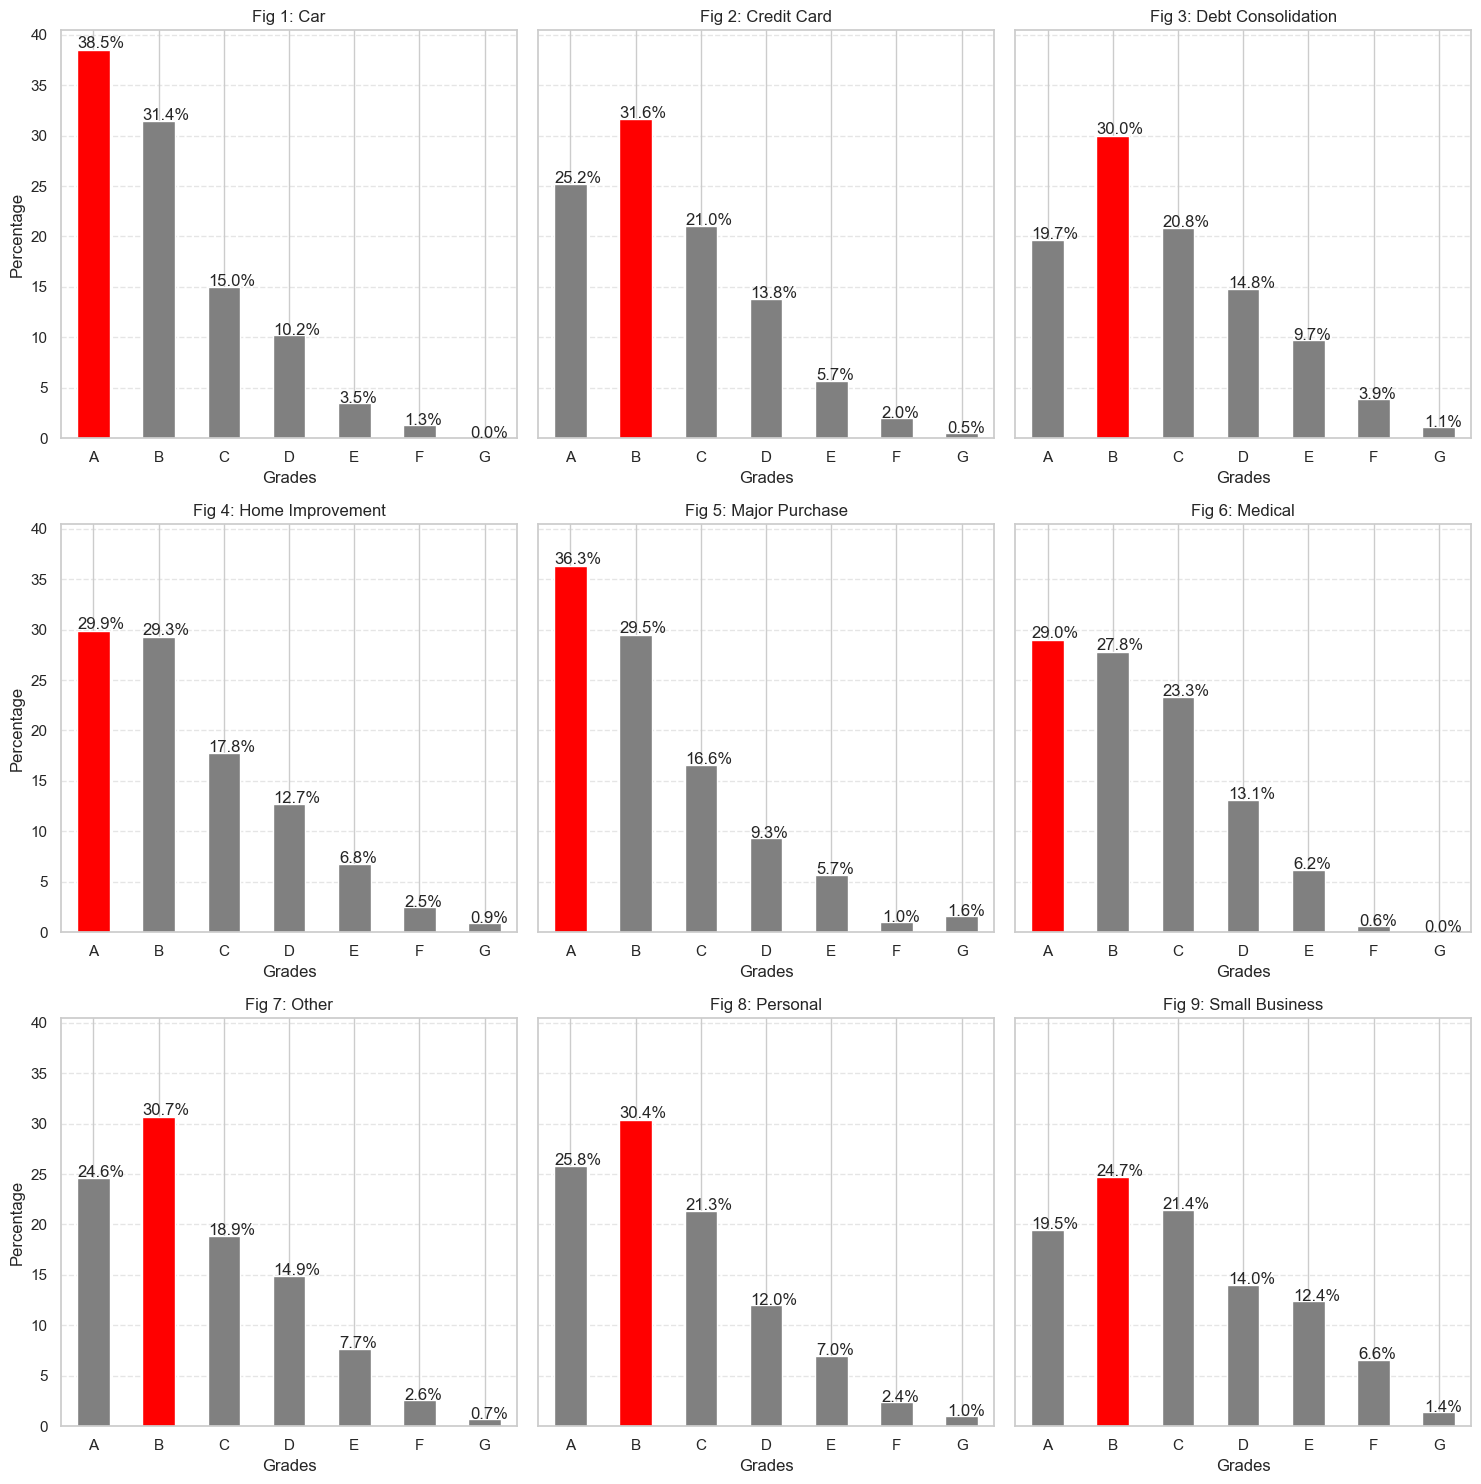

In [1065]:
num_rows = len(loan_counts_by_grade_percentage)

fig, axes = plt.subplots(3, 3, figsize=(15, 15), sharey=True)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each index value in a loop
for i, index in enumerate(loan_counts_by_grade_percentage.index):
    if i == num_rows - 1: # Show only top 9
        break
    values = loan_counts_by_grade_percentage.loc[index, :]
    colors = ['red' if value == values.max() else 'gray' for value in values]
    loan_counts_by_grade_percentage.loc[index, :].plot(kind='bar', ax=axes[i], color=colors)
    axes[i].set_title(f'Fig {i + 1}: {index}')
    axes[i].set_xlabel('Grades')
    axes[i].set_ylabel('Percentage')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=0)
    axes[i].grid(axis='y', linestyle='--', alpha=0.5)
    for p in axes[i].patches:
        axes[i].annotate(f"{str(p.get_height())}%", (p.get_x() * 1.005, p.get_height() * 1.005))
    
plt.tight_layout()
plt.show()

### Loan defaults by Term Period

In [1066]:
# remove % from int_rate column and convert to floats
df['int_rate'] = df['int_rate'].apply(lambda x: float(x.replace('%', '')))

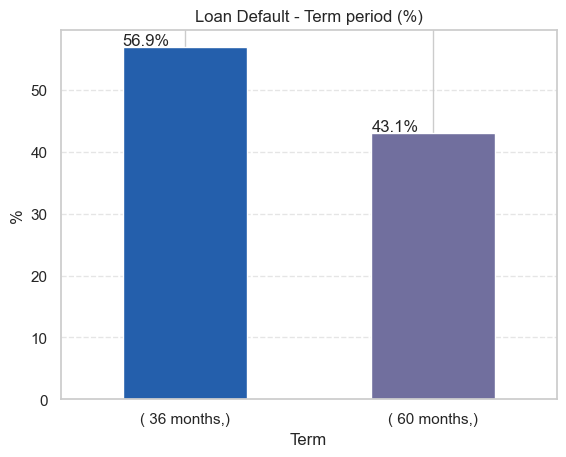

In [1067]:
# See which grade of loans default most
df_defaults_counts = df_defaults[['term']].value_counts()

# Plot those grades
default_percentages = round((df_defaults_counts / df_defaults_counts.sum()) * 100, 1)

# Plot it
# np.random.seed(10)
colors = np.random.rand(len(df_defaults_counts), 3) 
plot = default_percentages.plot(kind='bar', color=colors)
plt.title('Loan Default - Term period (%)')
plt.xlabel('Term')
plt.ylabel('%')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)

for p in plot.patches:
    plot.annotate(f"{str(p.get_height())}%", (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()

### Drill down on loan products on Term Period and Default rates

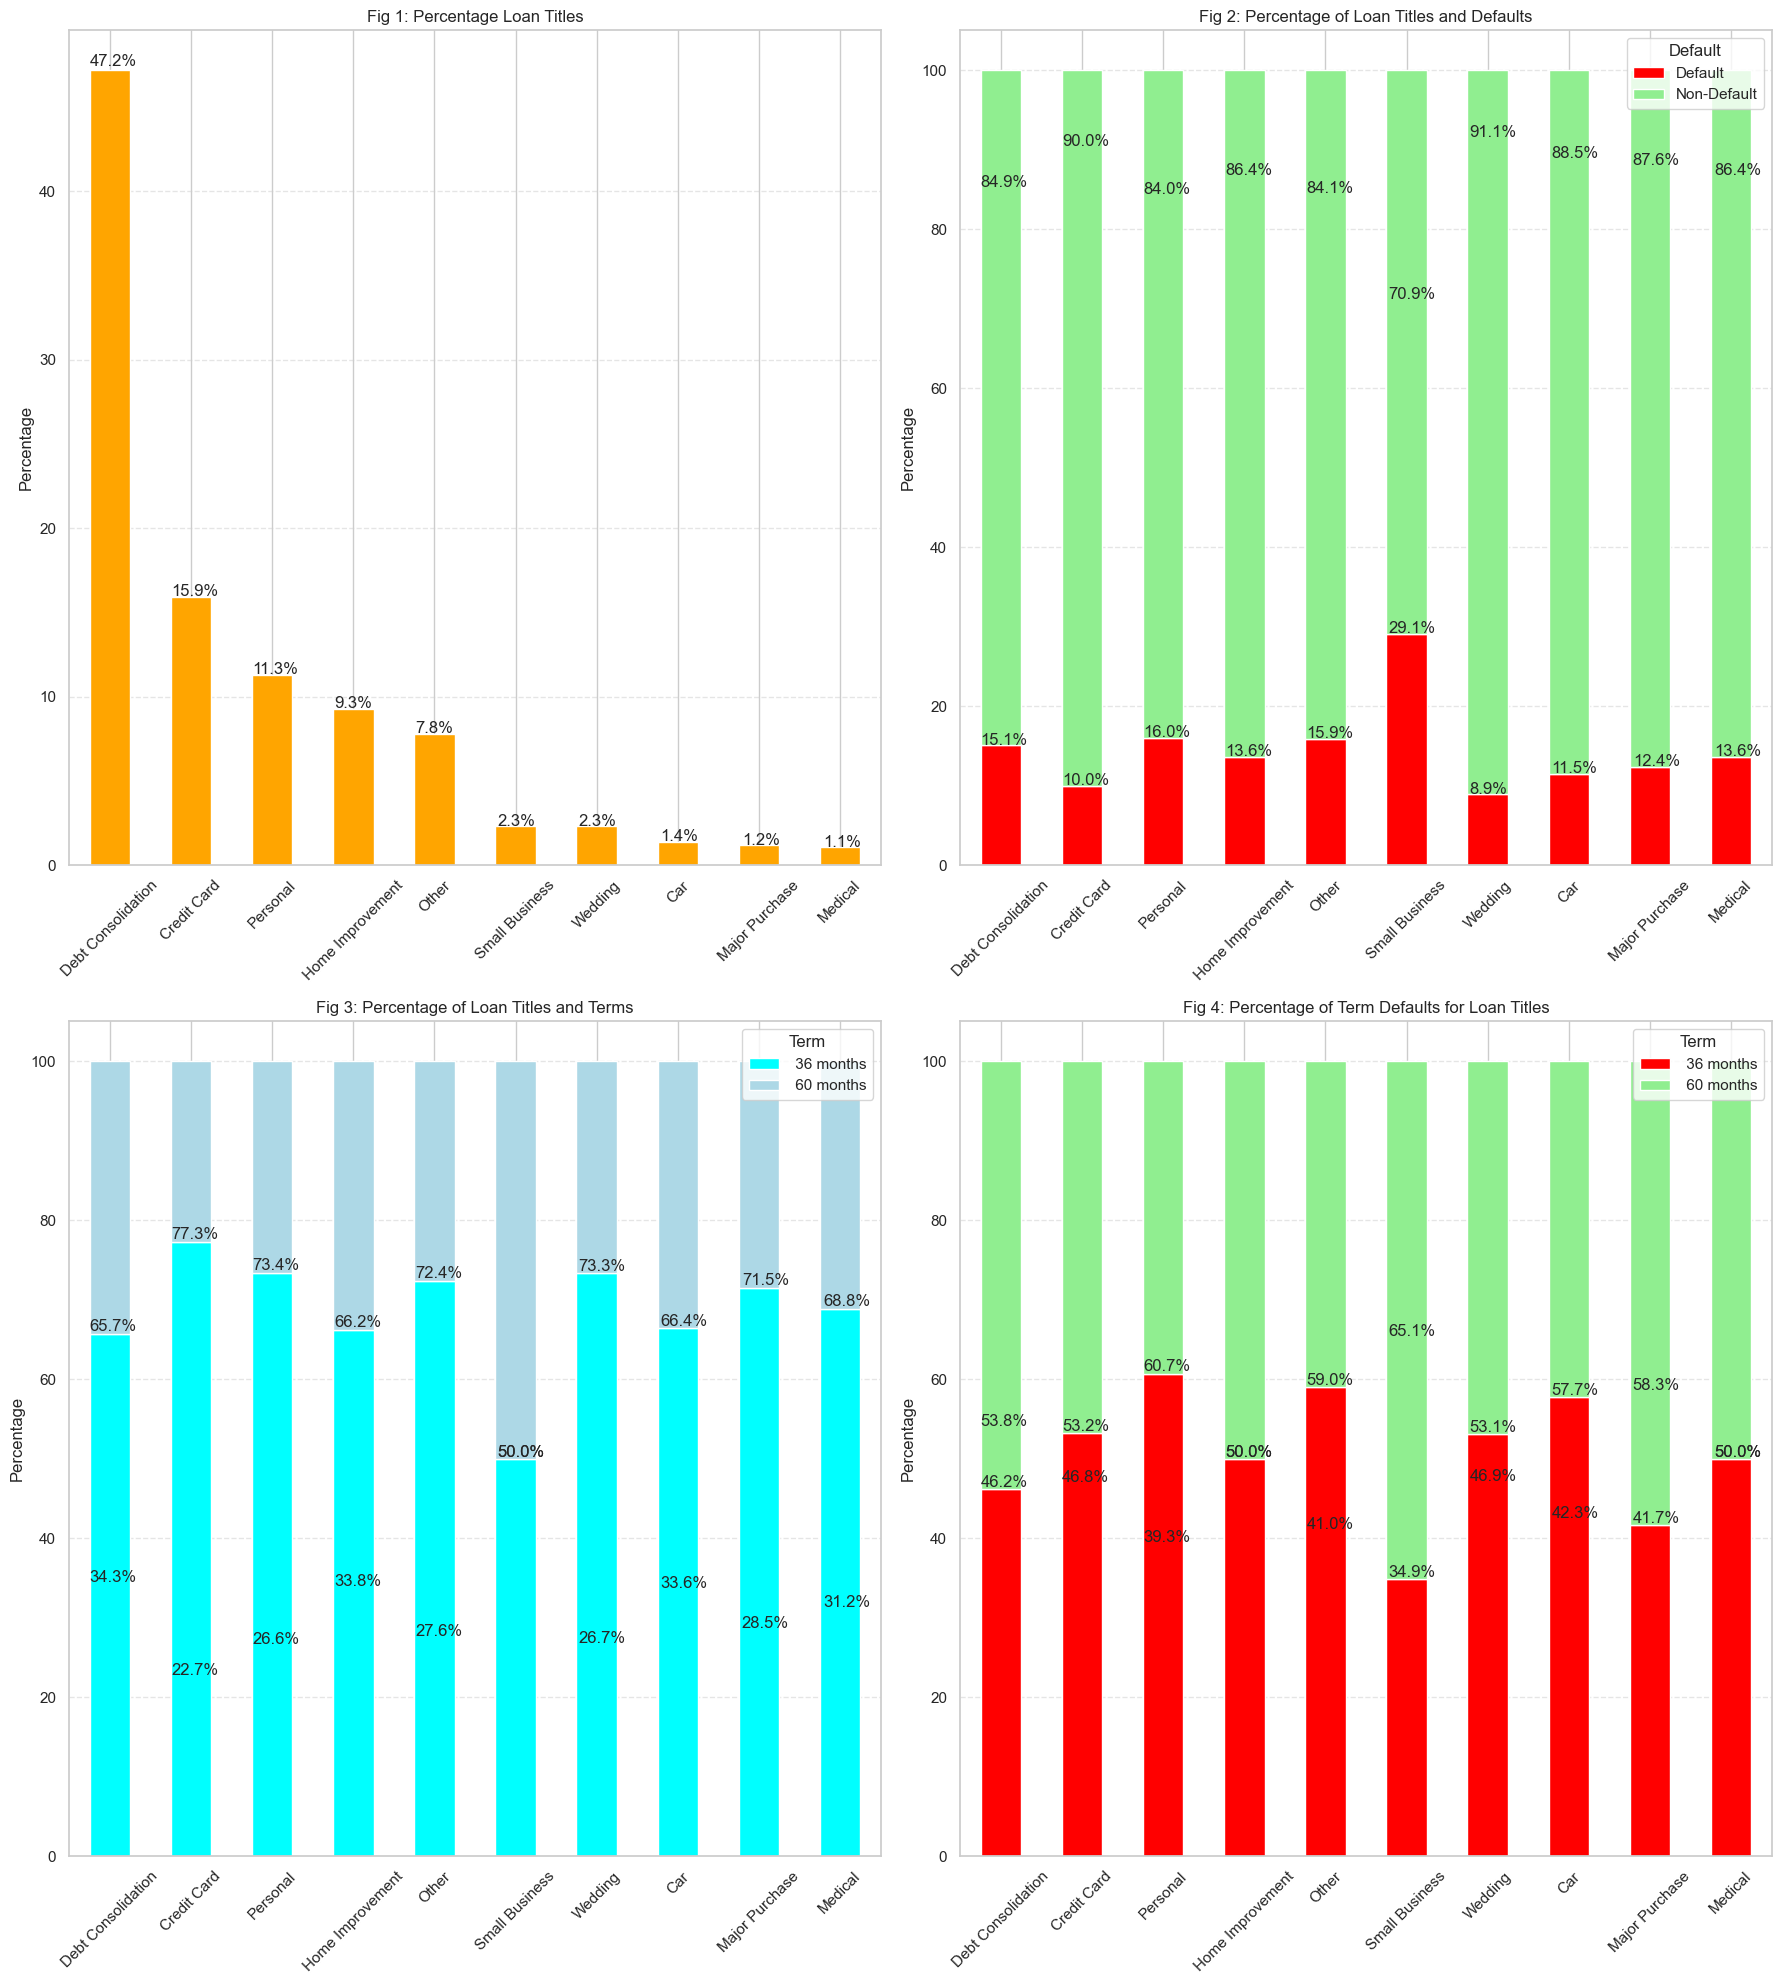

In [1068]:
# See which grade of loans default most
title_counts = df['title'].value_counts()

# Sort the DataFrame by 'title' count
df['title'] = pd.Categorical(df['title'], categories=title_counts.index, ordered=True)
df = df.sort_values('title')

# (1) get the title counts
df_title_counts = df['title'].value_counts().head(10)
df_title_percentage = round((df_title_counts / df_title_counts.sum()) * 100, 1)

# (2) get the percentage of defaults per title
df_counts = df.groupby(['title', 'default'], observed=True).size().unstack(fill_value=0).head(10)
df_counts_percentage = round(df_counts.div(df_counts.sum(axis=1), axis=0) * 100, 1)

# (3) get the percentage of term per title
df_terms = df.groupby(['title', 'term'], observed=True).size().unstack(fill_value=0).head(10)
df_terms_percentage = round(df_terms.div(df_terms.sum(axis=1), axis=0) * 100, 1)

# (4) get the percentage of term for defaults per title
df_term_defaults = df[df['default'] == 'Default'].groupby(['title', 'term'], observed=True).size().unstack(fill_value=0).head(10)
df_term_defaults_percentage = round(df_term_defaults.div(df_term_defaults.sum(axis=1), axis=0) * 100, 1)

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(18, 20), sharey=False)

# Plot the counts percentage bar chart
df_title_percentage.plot(kind='bar', color=['orange'], ax=axes[0][0])
axes[0][0].set_title('Fig 1: Percentage Loan Titles')
axes[0][0].set_xlabel('')
axes[0][0].set_ylabel('Percentage')
axes[0][0].set_xticklabels(axes[0][0].get_xticklabels(), rotation=45)
axes[0][0].grid(axis='y', linestyle='--', alpha=0.5)
for p in axes[0][0].patches:
    axes[0][0].annotate(f"{str(p.get_height())}%", (p.get_x() * 1.005, p.get_height() * 1.005))
    

# Plot the percentage stacked bar chart for defaults
df_counts_percentage.plot(kind='bar', stacked=True, color=['red', 'lightgreen'], ax=axes[0][1])
axes[0][1].set_title('Fig 2: Percentage of Loan Titles and Defaults')
axes[0][1].set_xlabel('')
axes[0][1].set_ylabel('Percentage')
axes[0][1].set_xticklabels(axes[0][1].get_xticklabels(), rotation=45)
axes[0][1].legend(title='Default')
axes[0][1].grid(axis='y', linestyle='--', alpha=0.5)
for p in axes[0][1].patches:
    axes[0][1].annotate(f"{str(p.get_height())}%", (p.get_x() * 1.005, p.get_height() * 1.005))
    

# Plot the percentage stacked bar chart for terms
df_terms_percentage.plot(kind='bar', stacked=True, color=['cyan', 'lightblue'], ax=axes[1][0])
axes[1][0].set_title('Fig 3: Percentage of Loan Titles and Terms')
axes[1][0].set_xlabel('')
axes[1][0].set_ylabel('Percentage')
axes[1][0].set_xticklabels(axes[0][1].get_xticklabels(), rotation=45)
axes[1][0].legend(title='Term')
axes[1][0].grid(axis='y', linestyle='--', alpha=0.5)
for p in axes[1][0].patches:
    axes[1][0].annotate(f"{str(round(p.get_height(), 1))}%", (p.get_x() * 1.005, p.get_height() * 1.005))
    
    
# Plot the percentage stacked bar chart for terms
df_term_defaults_percentage.plot(kind='bar', stacked=True, color=['red', 'lightgreen'], ax=axes[1][1])
axes[1][1].set_title('Fig 4: Percentage of Term Defaults for Loan Titles')
axes[1][1].set_xlabel('')
axes[1][1].set_ylabel('Percentage')
axes[1][1].set_xticklabels(axes[0][1].get_xticklabels(), rotation=45)
axes[1][1].legend(title='Term')
axes[1][1].grid(axis='y', linestyle='--', alpha=0.5)
for p in axes[1][1].patches:
    axes[1][1].annotate(f"{str(round(p.get_height(), 1))}%", (p.get_x() * 1.005, p.get_height() * 1.005))
    
    
plt.tight_layout()
plt.show()


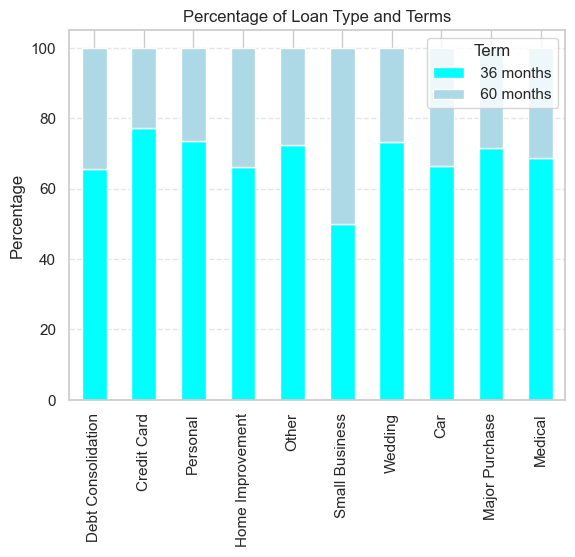

In [1069]:
# Plot the percentage stacked bar chart for terms
plot = df_terms_percentage.plot(kind='bar', stacked=True, color=['cyan', 'lightblue'])
plt.title('Percentage of Loan Type and Terms')
plt.xlabel('')
plt.ylabel('Percentage')
plt.legend(title='Term')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

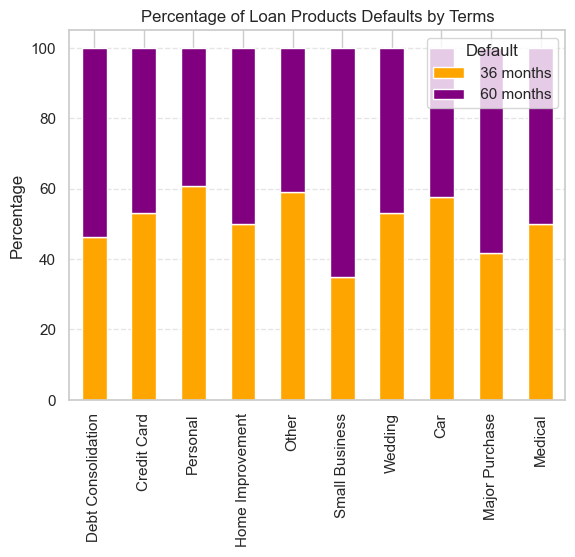

In [1070]:
# Plot the percentage stacked bar chart for defaults
df_term_defaults_percentage.plot(kind='bar', stacked=True, color=['orange', 'purple'])
plt.title('Percentage of Loan Products Defaults by Terms')
plt.xlabel('')
plt.ylabel('Percentage')
# axes[0][1].set_xticklabels(axes[0][1].get_xticklabels(), rotation=45)
plt.legend(title='Default')
plt.grid(axis='y', linestyle='--', alpha=0.5)

### Interest rates for top loan products

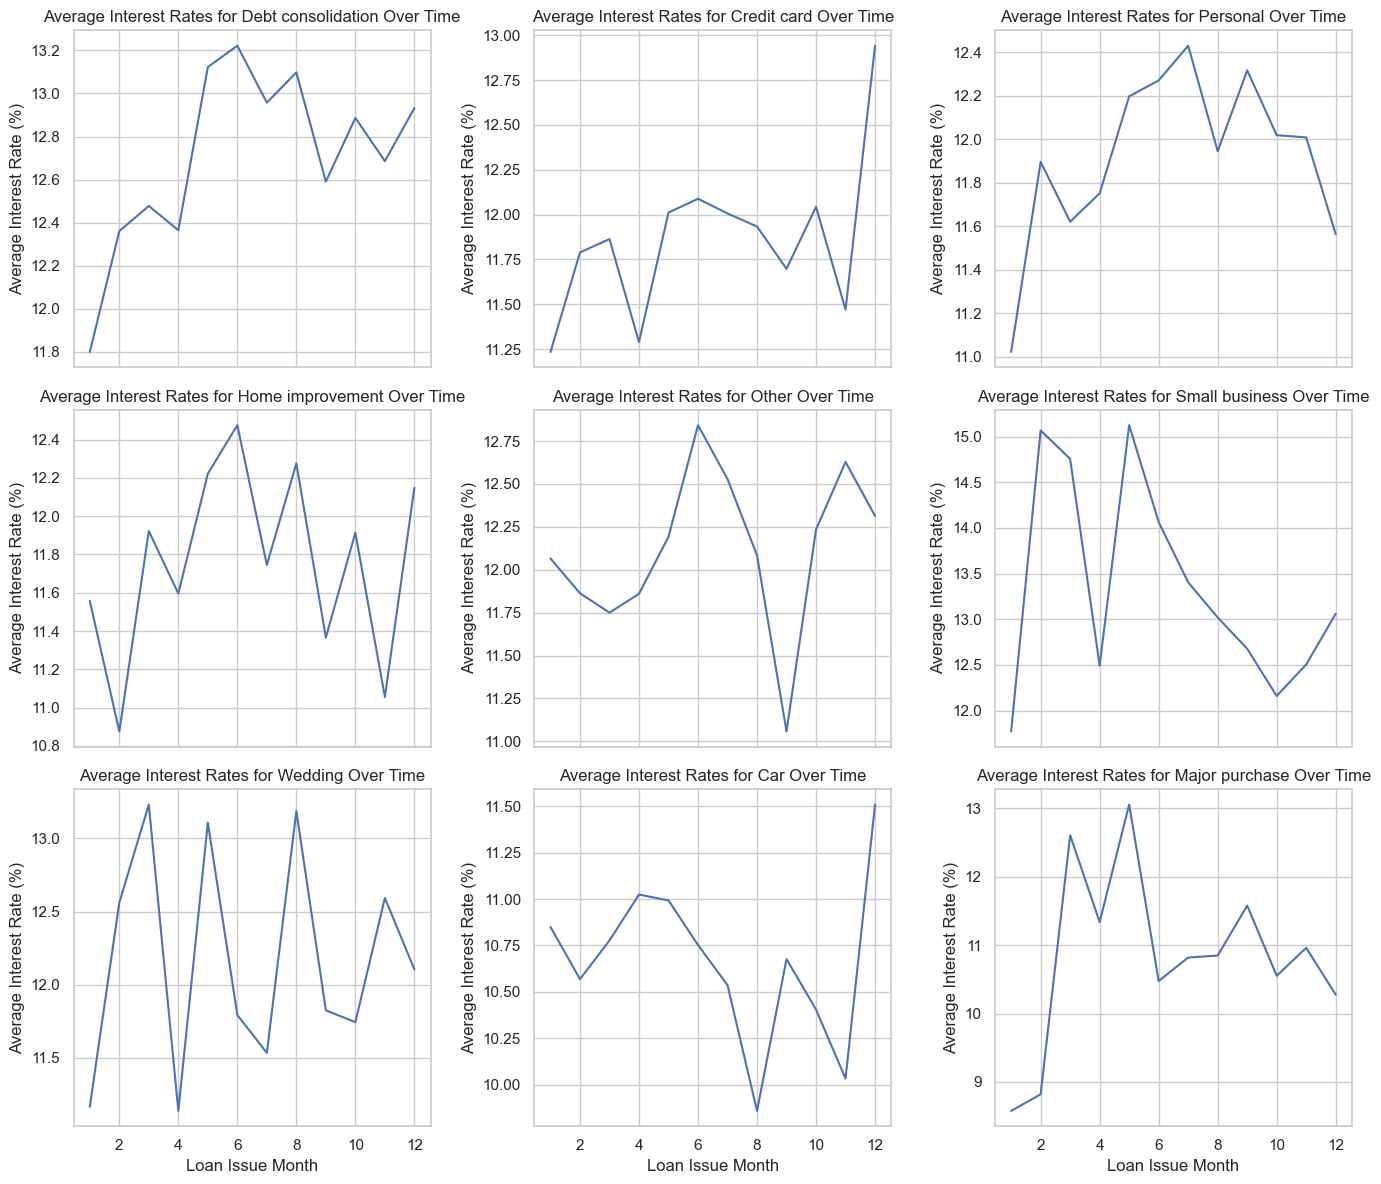

In [1071]:
# Determine the top loan products by count
top_loan_products = df['title'].value_counts().nlargest(10).index

# Filter the average interest rates for the top loan products
average_interest_rates_top = average_interest_rates_over_time[top_loan_products]

# Plot the average interest rates for each loan product over time
# Create subplots for each loan product
fig, axes = plt.subplots(3, 3, figsize=(14, 12), sharex=True)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each of the top loan products in separate subplots
for i, product in enumerate(top_loan_products):
    if i == 9: # Show only top 9
        break
    average_interest_rates_top[product].plot(kind='line', ax=axes[i])
    axes[i].set_title(f'Average Interest Rates for {product.capitalize()} Over Time')
    axes[i].set_xlabel('Loan Issue Month')
    axes[i].set_ylabel('Average Interest Rate (%)')
    axes[i].grid(True)

plt.tight_layout()
plt.show()

In [1072]:
round(average_interest_rates_top.mean(), 2)

title
Debt Consolidation    12.71
Credit Card           11.86
Personal              11.92
Home Improvement      11.76
Other                 12.12
Small Business        13.34
Wedding               12.16
Car                   10.67
Major Purchase        10.83
Medical               11.60
dtype: float64

## Borrower Information

### Zip code analysis for defaulted users

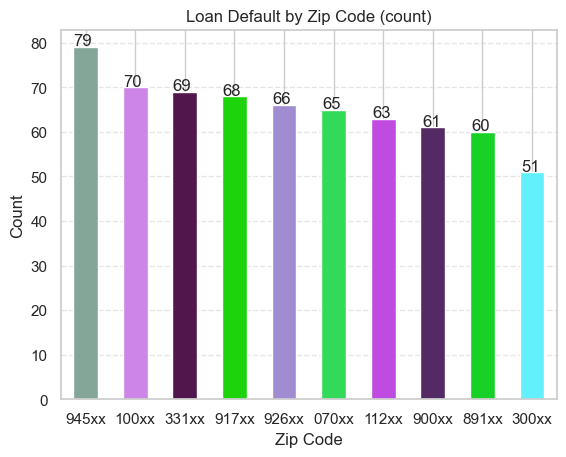

In [1073]:
# df['zip_code'].value_counts()
df_defaults_zipcode = df_defaults['zip_code'].value_counts().head(10)

colors = np.random.rand(len(df_defaults_zipcode), 3) 
plot = df_defaults_zipcode.plot(kind='bar', color=colors)
plt.title('Loan Default by Zip Code (count)')
plt.xlabel('Zip Code')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)

for p in plot.patches:
    plot.annotate(f"{str(p.get_height())}", (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()

### Loan default by Employment Length

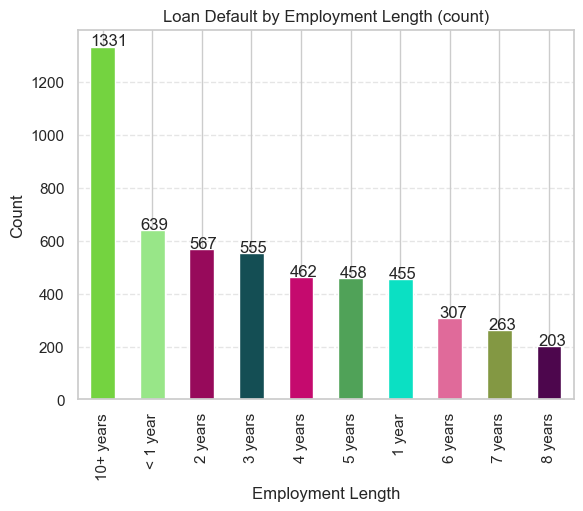

In [1074]:
df_defaults_emp_length = df_defaults['emp_length'].value_counts().head(10)

colors = np.random.rand(len(df_defaults_emp_length), 3) 
plot = df_defaults_emp_length.plot(kind='bar', color=colors)
plt.title('Loan Default by Employment Length (count)')
plt.xlabel('Employment Length')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.5)

for p in plot.patches:
    plot.annotate(f"{str(p.get_height())}", (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()

### Loan default by Home ownership type

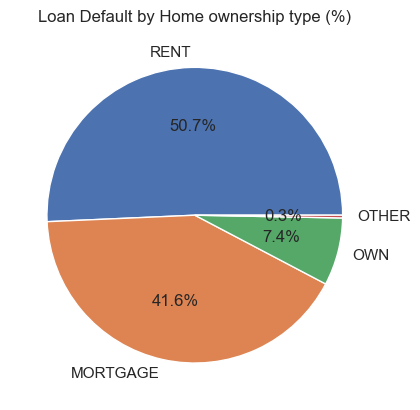

In [1075]:
df_defaults_home_ownership = round(df_defaults['home_ownership'].value_counts(normalize=True).head(10) * 100, 1)

colors = np.random.rand(len(df_defaults_home_ownership), 3) 
plot = df_defaults_home_ownership.plot(kind='pie', color=colors, autopct=lambda x: f'{round(x, 1)}%')
plt.title('Loan Default by Home ownership type (%)')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=0)

plt.show()

### Income range of defaulted customers by income verification status 

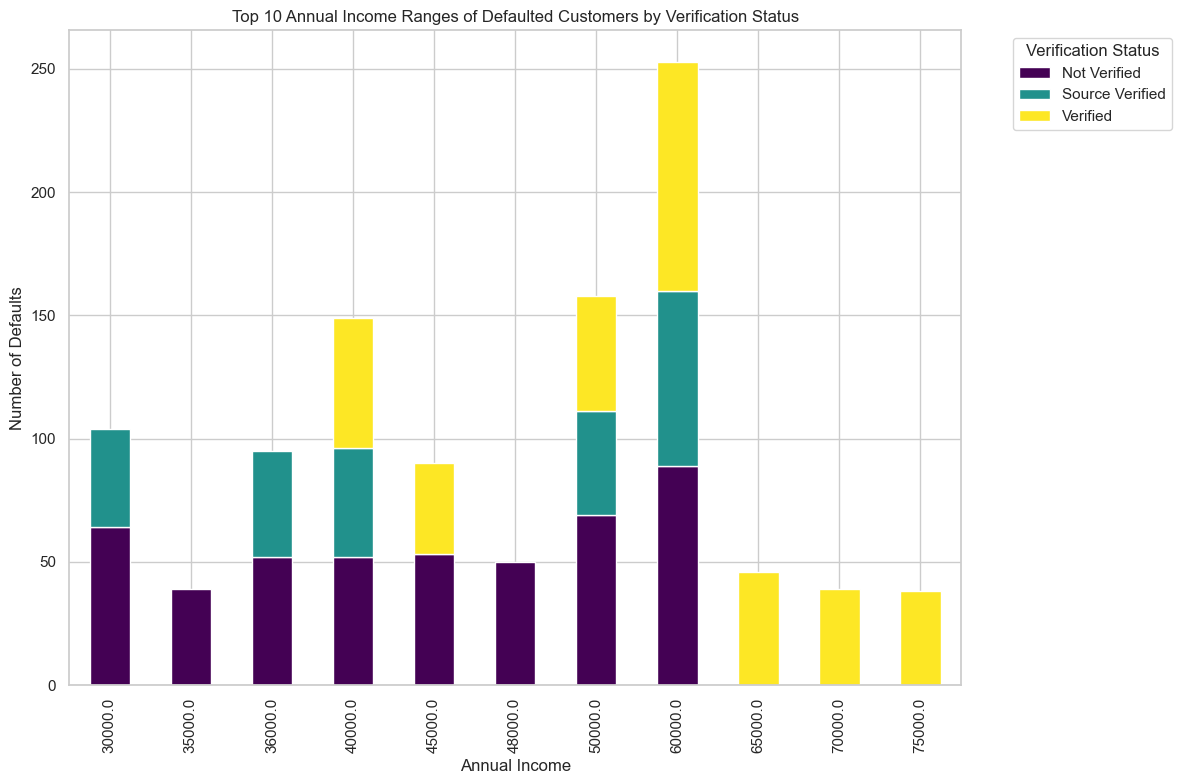

In [1076]:
# df_defaults_emp_income = df_defaults['annual_inc'].value_counts().head(10)
df_defaults_emp_income = df_defaults.groupby(['annual_inc', 'verification_status']).size().reset_index(name='counts')
df_top10_defaults = df_defaults_emp_income.nlargest(20, 'counts')
df_top10_defaults

# Pivot the DataFrame for plotting
df_pivot = df_top10_defaults.pivot(index='annual_inc', columns='verification_status', values='counts').fillna(0)

# Plot the stacked bar chart
df_pivot.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')
plt.title('Top 10 Annual Income Ranges of Defaulted Customers by Verification Status')
plt.xlabel('Annual Income')
plt.ylabel('Number of Defaults')
plt.legend(title='Verification Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

## Credit Information

### Loan defaults by past delinquencies

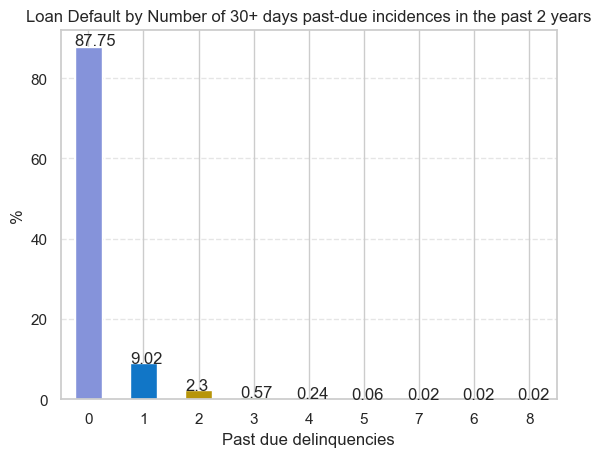

In [1077]:
df_defaults_delinq2yrs = round(df_defaults['delinq_2yrs'].value_counts(normalize=True).head(10) * 100, 2)

colors = np.random.rand(len(df_defaults_delinq2yrs), 3) 
plot = df_defaults_delinq2yrs.plot(kind='bar', color=colors)
plt.title('Loan Default by Number of 30+ days past-due incidences in the past 2 years')
plt.xlabel('Past due delinquencies')
plt.ylabel('%')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)

for p in plot.patches:
    plot.annotate(f"{str(p.get_height())}", (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()

### Loan Default by Number of derogatory public records

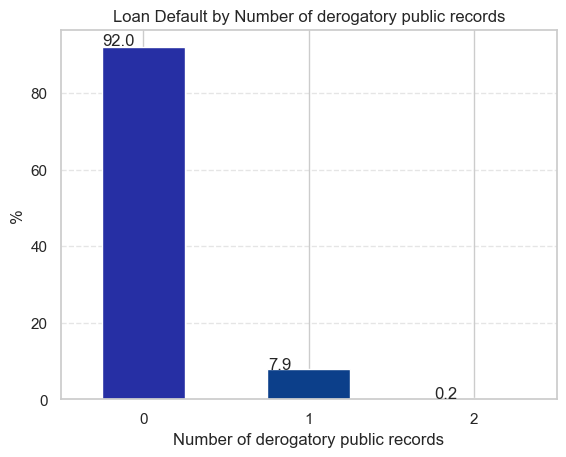

In [1078]:
df_defaults_pub_rec = round(df_defaults['pub_rec'].value_counts(normalize=True).head(10) * 100, 1)

colors = np.random.rand(len(df_defaults_pub_rec), 3) 
plot = df_defaults_pub_rec.plot(kind='bar', color=colors)
plt.title('Loan Default by Number of derogatory public records')
plt.xlabel('Number of derogatory public records')
plt.ylabel('%')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)

for p in plot.patches:
    plot.annotate(f"{str(p.get_height())}", (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()

### Funding Status of Defaulted Loans

     Funding Status  Counts
0      Fully Funded  5086.0
1  Partially Funded   312.0


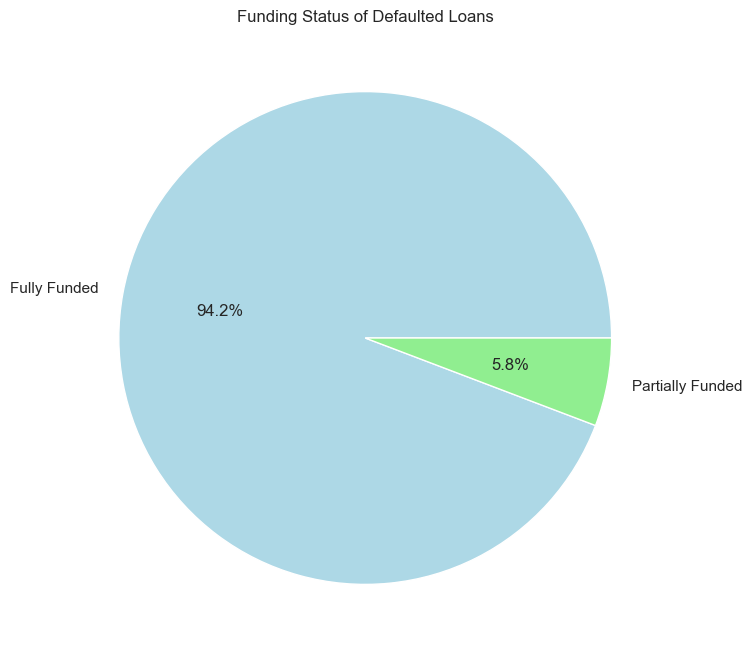

In [1079]:
# round(df_defaults['pub_rec'].value_counts(normalize=True).head(10) * 100, 1)

df_defaults_loan_funded_amt = df_defaults.groupby(['loan_amnt', 'funded_amnt']).size().reset_index(name='counts').sort_values(by='counts', ascending=False).head(1000)
df_defaults_loan_funded_amt['funded_percent'] = round(df_defaults_loan_funded_amt['funded_amnt'] / df_defaults_loan_funded_amt['loan_amnt'] * 100)

fully_funded = df_defaults_loan_funded_amt[df_defaults_loan_funded_amt['funded_percent'] == 100].sum()['counts']
partially_funded = df_defaults_loan_funded_amt[df_defaults_loan_funded_amt['funded_percent'] < 100].sum()['counts']

total = fully_funded + partially_funded
df_defaults_funding = pd.DataFrame({
    'Funding Status': ['Fully Funded', 'Partially Funded'],
    'Counts': [fully_funded, partially_funded],
})

print(df_defaults_funding)

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(df_defaults_funding['Counts'], labels=df_defaults_funding['Funding Status'], autopct='%1.1f%%', colors=['lightblue', 'lightgreen'])
plt.title('Funding Status of Defaulted Loans')
plt.show()


### Funding breakdown for Defaulted Loans

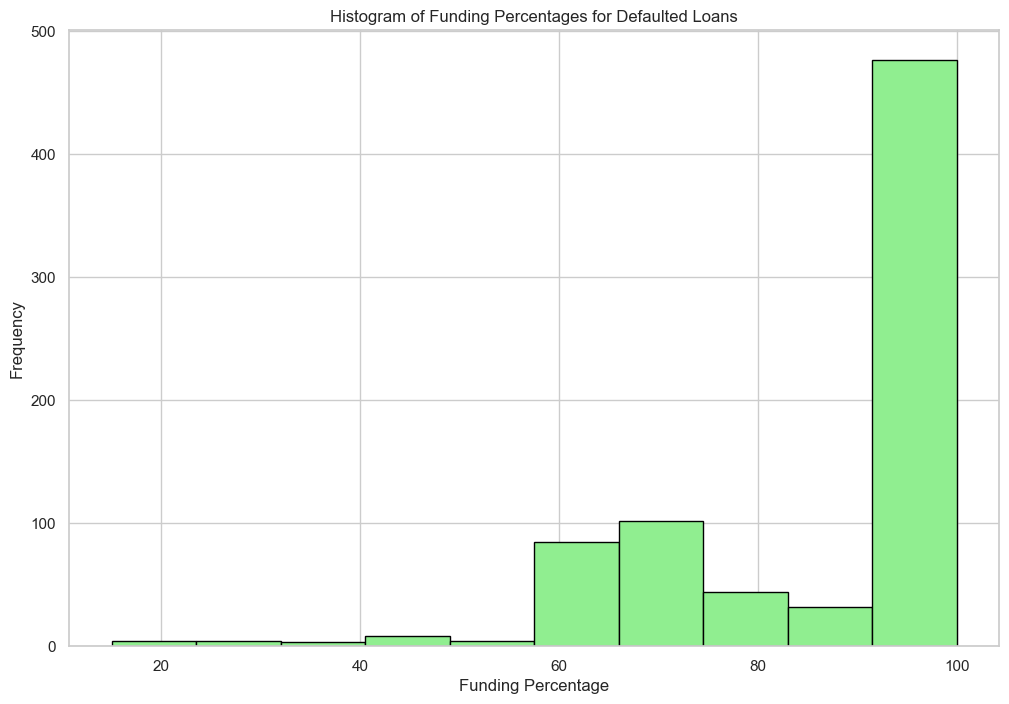

In [1080]:
# Plot the histogram for funding percentages
plt.figure(figsize=(12, 8))
plt.hist(df_defaults_loan_funded_amt['funded_percent'], bins=10, color='lightgreen', edgecolor='black')
plt.title('Histogram of Funding Percentages for Defaulted Loans')
plt.xlabel('Funding Percentage')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### 